### Data Cleaning for Final Assignment

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isna().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    7043
dtype: int64

In [6]:
#Checking for Clas Imbalance
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# Remove Customer Id as it is not a variable which can affect the customer to leave the teleco company 

df.drop(columns='customerID', axis=1, inplace=True)

In [8]:
#Total Charges is of type object, it might contain errors- remove errors 
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isna().sum(axis=0)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges'].dropna(inplace=True)

In [12]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


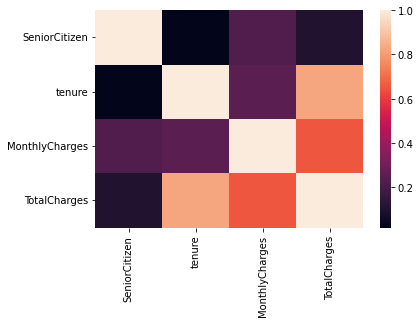

In [13]:
sns.heatmap(df.corr());

#### Exploring Tenure Feature

In [14]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x298aa6f14f0>,
 'caps': [<matplotlib.lines.Line2D at 0x298aa6f1b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x298aa6f1220>],
 'medians': [<matplotlib.lines.Line2D at 0x298aa705070>],
 'fliers': [<matplotlib.lines.Line2D at 0x298aa705340>],
 'means': []}

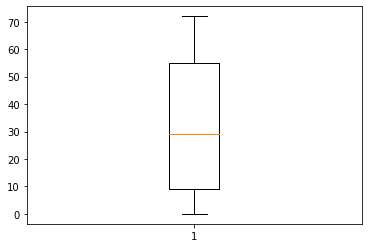

In [15]:
plt.boxplot(df['tenure'])

c:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


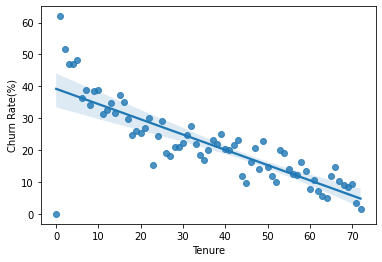

In [16]:
df_grouped = df.groupby('tenure').count()


df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby('tenure').sum()
df_churngrouped


df_tenure_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])

ax =sns.regplot(df_tenure_churned.index,df_tenure_churned)
ax.set(xlabel='Tenure', ylabel='Churn Rate(%)')
plt.show()

### Product Exploration 


In [17]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

c:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


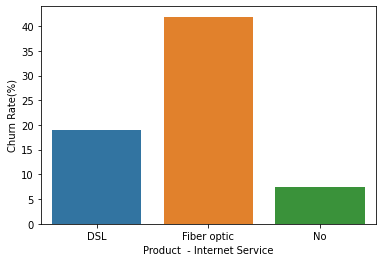

In [18]:
df_grouped = df.groupby('InternetService').count()

df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby('InternetService').sum()
df_churngrouped


df_internet_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])


ax= sns.barplot(df_internet_churned.index,df_internet_churned)
ax.set(xlabel='Product  - Internet Service', ylabel='Churn Rate(%)')
plt.show()

### Contract Exploration

In [19]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

c:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


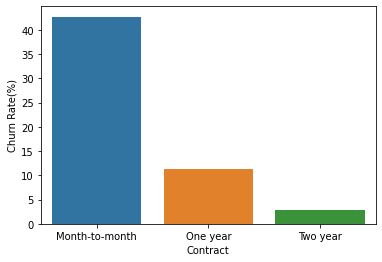

In [20]:
df_grouped = df.groupby('Contract').count()

df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby('Contract').sum()
df_churngrouped


df_contract_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])


ax = sns.barplot(df_contract_churned.index,df_contract_churned)
ax.set(xlabel='Contract', ylabel='Churn Rate(%)')
plt.show()

### Monthly Charges Exploration

In [21]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [22]:
df['MonthlyChargesLevel'] = np.where(
    df['MonthlyCharges'] > 100, "High", np.where(
    df['MonthlyCharges'] > 50, "Medium", "Low")) 

In [23]:
df['MonthlyChargesLevel'].value_counts()

Medium    3842
Low       2299
High       902
Name: MonthlyChargesLevel, dtype: int64

c:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


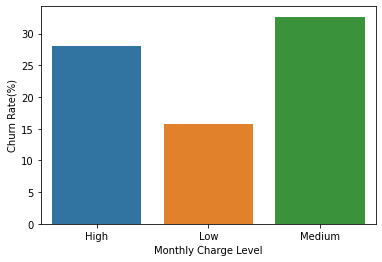

In [24]:
df_grouped = df.groupby('MonthlyChargesLevel').count()

df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby('MonthlyChargesLevel').sum()
df_churngrouped


df_monthly_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])


ax= sns.barplot(df_monthly_churned.index,df_monthly_churned)
ax.set(xlabel='Monthly Charge Level', ylabel='Churn Rate(%)')
plt.show()

### Payment Method Exploration

In [25]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

c:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod'>

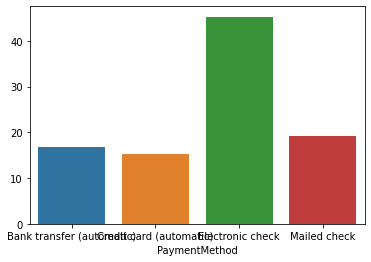

In [26]:
df_grouped = df.groupby('PaymentMethod').count()

df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby('PaymentMethod').sum()
df_churngrouped


df_payment_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])


sns.barplot(df_payment_churned.index,df_payment_churned)

### Tenure and Monthly Charges Analysis

In [27]:
df['TenureLevel'] = np.where(
    df['tenure'] > 50, "High", np.where(
    df['tenure'] > 10, "Medium", "Low")) 

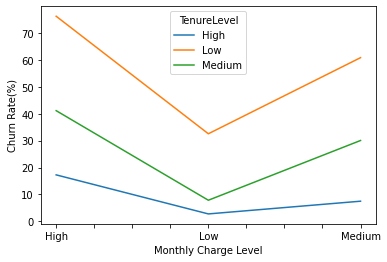

In [28]:
df_grouped = df.groupby(['MonthlyChargesLevel','TenureLevel']).count()

df_spilt_churn = pd.get_dummies(df['Churn'])
df_spilt_churn_new = pd.concat([df, df_spilt_churn], axis=1)  

df_spilt_churn_new = df_spilt_churn_new.drop('Churn',axis=1)
df_spilt_churn_new


df_churngrouped =  df_spilt_churn_new.groupby(['MonthlyChargesLevel','TenureLevel']).sum()
df_churngrouped


df_ten_churned = 100* (df_churngrouped['Yes']/df_grouped['Churn'])
df_ten_churned
# sns.regplot(df_ten_churned.index,df_ten_churned)

ax= df_ten_churned.unstack().plot()
ax.set(xlabel='Monthly Charge Level', ylabel='Churn Rate(%)')
plt.show()
plt.show()

In [170]:
df.to_csv("Cleaned_telco_dataset.csv")